
# ROC Curve and AUC Score

## Understanding ROC Curve
- **ROC Curve** (Receiver Operating Characteristic Curve) plots the True Positive Rate (Recall) against the False Positive Rate at various threshold settings.
- **False Positive Rate (FPR)** = FP / (FP + TN)
- **True Positive Rate (TPR or Recall)** = TP / (TP + FN)

## AUC (Area Under Curve)
- **AUC** measures the entire two-dimensional area underneath the ROC curve.
- **AUC Score Ranges:**
  - 0.9–1 = Excellent
  - 0.8–0.9 = Good
  - 0.7–0.8 = Fair
  - 0.6–0.7 = Poor
  - 0.5–0.6 = Fail

## Objective
- Learn to **plot ROC curves** for different models or thresholds.
- Understand how to **select the best model** based on AUC.


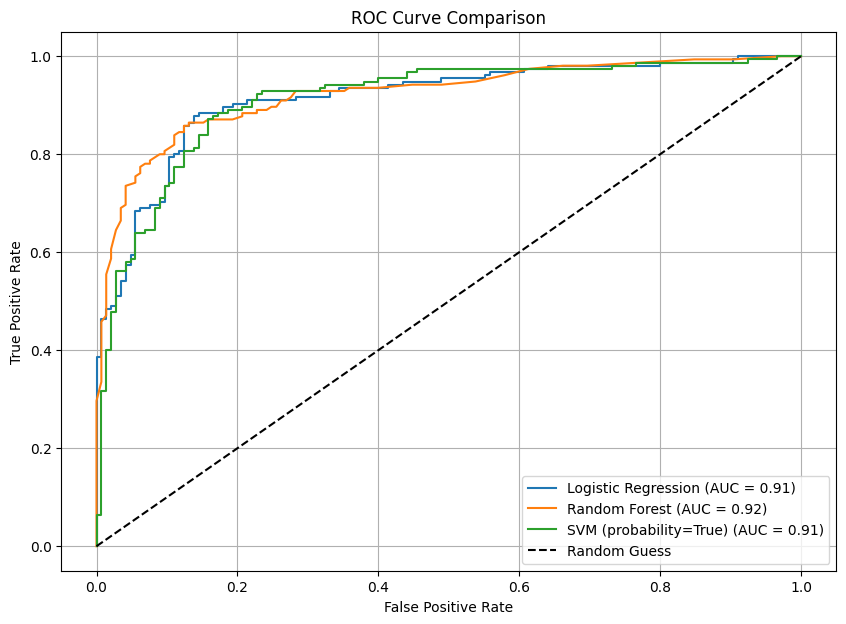

In [1]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM (probability=True)": SVC(probability=True)
}

# Plot ROC curves
plt.figure(figsize=(10, 7))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()
